In [1]:
import os

import pandas as pd
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit

In [2]:
# all data
DATA_DIR = 'data'
FILE_NAME = 'initial_timeseries_SEIRD.csv' 
FILE_PATH = os.path.join(os.pardir, DATA_DIR, FILE_NAME)
df = pd.read_csv(FILE_PATH)

# derived data
cum_positives = np.cumsum(df.confirmed_positives.values)
cum_recovered = df.estimate_recovered.values
cum_deceased = np.cumsum(df.confirmed_deceased.values)

In [3]:
# solution domain
t = np.arange(0, cum_positives.size)

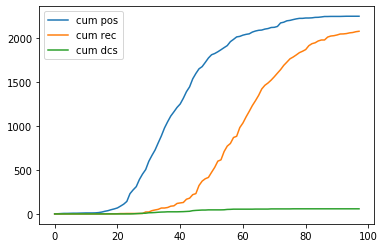

In [4]:
plt.plot(t, cum_positives, label='cum pos')
plt.plot(t, cum_recovered, label='cum rec')
plt.plot(t, cum_deceased, label='cum dcs')
plt.legend()
plt.show()

In [5]:
# initial conditions
S0 = cum_positives[-1] + cum_deceased[-1]
E0 = 10
I0 = 1
R0 = 0
D0 = 0
IC = [S0, E0, I0, R0, D0]
IC

[2306.0, 10, 1, 0, 0]

In [17]:
# ode system
def SEIRD(t, y, beta, delta, alpha, gamma, mu):
    S, E, I, R, D = y
    N = S + E + I + R + D
    return [
        -beta*S*I/N - delta*S*E, 
        beta*S*I/N - alpha*E + delta*S*E, 
        alpha*E - gamma*I - mu*I, 
        gamma*I,
        mu*I,
    ]

# wrapper for curve_fit
def solve_ivp_wrapper(t, beta, delta, alpha, gamma, mu):
    sol = solve_ivp(
        SEIRD, 
        t_span=(0, t.size), 
        y0=IC, 
        args=(beta, delta, alpha, gamma, mu),
        t_eval=np.arange(0, t.size), 
        method='RK45', 
        vectorized=True,
    )
    return sol.y[2].ravel()

In [21]:
input_data = cum_positives - cum_deceased - cum_recovered

In [ ]:
popt, pcov = curve_fit(solve_ivp_wrapper, t, input_data, p0=[0.4, 0.001, 0.1, 0.1, 0.1])

In [37]:
sol = solve_ivp(
        SIR, 
        t_span=(0, t.size), 
        y0=IC, 
        args=popt,
        t_eval=np.arange(0, t.size), 
        method='RK45', 
        vectorized=True,)

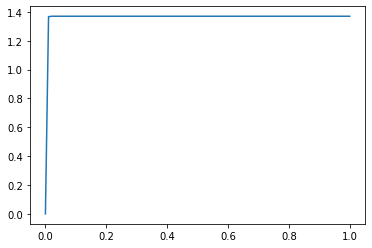

In [42]:
plt.plot(t, sol.y[2])

In [82]:
import numpy as np
from scipy.integrate import solve_ivp

x = np.linspace(0, 1)

def f(x, y, a):
    '''
    dy/dx = y(x)
    '''
    return [a*y[0]]

def analytic_sol(x, a):
    return np.exp(a*x)

y = analytic_sol(x, 2)
y_data = y + np.random.uniform(-0.5, 0.5, y.size)

In [83]:
def solve_ivp_wrapper(x, a):
    sol = solve_ivp(
        f, 
        t_span=(x.min(), x.max()), 
        args=(a, ),
        t_eval=x,
        y0=np.array([1]),
        method='RK45', 
        vectorized=True,)
    return sol.y.ravel()

In [84]:
from scipy.optimize import curve_fit

In [85]:
popt, pcov = curve_fit(solve_ivp_wrapper, x, y_data)

In [86]:
popt

array([1.9841986])